<a href="https://colab.research.google.com/github/kobeisfree94/Projects/blob/master/COVID_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm 
import datetime as dt
from fbprophet import Prophet

In [3]:
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/DataSets/covid_19_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Exploratory Data Analysis**

In [4]:
df.shape

(306429, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [6]:
#Check Missing Values
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [7]:
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
df.tail(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [9]:
df['ObservationDate'].unique()

array(['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020',
       '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020',
       '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020',
       '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020',
       '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020',
       '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020',
       '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020',
       '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020',
       '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020',
       '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020',
       '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020',
       '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020',
       '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020',
       '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020',
       '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020',
       '03/22/2020', '03/23/2020', '03/24/2020', '03/25

In [10]:
df['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [11]:
df['Province/State'].unique().any() == 'Seoul'

False

In [12]:
df_korea = df.loc[df['Country/Region']=='South Korea']
df_korea = df_korea.reset_index().drop(columns=['SNo', 'Province/State', 'Last Update', 'index'])
df_korea.shape

(494, 5)

In [13]:
df_korea['ObservationDate'] = pd.to_datetime(df_korea['ObservationDate'])

In [14]:
df_korea.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,South Korea,1.0,0.0,0.0
1,2020-01-23,South Korea,1.0,0.0,0.0
2,2020-01-24,South Korea,2.0,0.0,0.0
3,2020-01-25,South Korea,2.0,0.0,0.0
4,2020-01-26,South Korea,3.0,0.0,0.0


In [15]:
df_korea.describe()

,Confirmed,Deaths,Recovered
count,494.000000,494.000000,494.000000
mean,42134.580972,700.406883,36605.953441
std,40840.640578,639.086908,37542.799513
min,1.000000,0.000000,0.000000
25%,11210.750000,267.500000,10238.250000
50%,23485.500000,397.000000,21072.000000
75%,76290.500000,1376.250000,65306.750000
max,139910.000000,1957.000000,130381.000000


In [16]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  494 non-null    datetime64[ns]
 1   Country/Region   494 non-null    object        
 2   Confirmed        494 non-null    float64       
 3   Deaths           494 non-null    float64       
 4   Recovered        494 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 19.4+ KB


In [17]:
#Feature Engineer Percentage
df_korea['Percent_Confirmed'] = df_korea['Confirmed'].pct_change(fill_method= 'ffill')
df_korea['Percent_Deaths'] = df_korea['Deaths'].pct_change(fill_method= 'ffill')

In [18]:
#Additional Dataset for more information
df2 = pd.read_csv('/content/gdrive/My Drive/Data AI_BootCamp//DataSets/owid-covid-data_3.csv')

In [19]:
df2 = df2.loc[:,['location', 'date', 
          'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed',
          'new_tests_smoothed', 'total_tests',
          'total_vaccinations','people_vaccinated', 'people_fully_vaccinated','new_vaccinations_smoothed','population']
      ]


In [20]:
df2.date= df2.date.astype(np.datetime64)

In [21]:
df2.isna().sum().sort_values(ascending=False)

people_fully_vaccinated      77945
people_vaccinated            75814
total_vaccinations           75113
new_vaccinations_smoothed    69927
total_tests                  45712
new_tests_smoothed           39853
total_deaths                 11585
new_cases_smoothed            2980
new_deaths_smoothed           2980
total_cases                   1977
population                     542
location                         0
date                             0
dtype: int64

In [22]:
#Cumulative data = grouped by location and fillna with forward fill(using value of the last valid observation)
df2[['location', 'date', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed',
     'new_tests_smoothed', 'total_tests', 'total_vaccinations','people_vaccinated', 'people_fully_vaccinated',
     'new_vaccinations_smoothed','population']]= df2.groupby('location')[['location', 'date', 
                                                                          'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'new_tests_smoothed', 
                                                                          'total_tests','total_vaccinations','people_vaccinated', 'people_fully_vaccinated',
                                                                          'new_vaccinations_smoothed','population']].fillna(method='ffill').fillna(0)

In [23]:
#Non-cumulative(new) data = fill NaN with the difference between 2 rows using .diff
df2.new_cases_smoothed=df2.groupby('location')['new_cases_smoothed'].fillna(df2.groupby('location')['total_cases'].diff(periods=1)).fillna(0)
df2.new_deaths_smoothed=df2.groupby('location')['new_deaths_smoothed'].fillna(df2.groupby('location')['total_deaths'].diff(periods=1)).fillna(0)
df2.new_tests_smoothed=df2.groupby('location')['new_tests_smoothed'].fillna(df2.groupby('location')['total_tests'].diff(periods=1)).fillna(0)
df2.new_vaccinations_smoothed=df2.groupby('location')['new_vaccinations_smoothed'].fillna(df2.groupby('location')['total_vaccinations'].diff(periods=1)).fillna(0)

In [24]:
#Rename the "_smoothed" columns for the sake of convenience
df2.rename(columns= {'new_cases_smoothed': 'new_cases'}, inplace=True)
df2.rename(columns= {'new_deaths_smoothed': 'new_deaths'}, inplace=True)
df2.rename(columns= {'new_tests_smoothed': 'new_tests'}, inplace=True)
df2.rename(columns= {'new_vaccinations_smoothed': 'new_vaccinations'}, inplace=True)

In [25]:
#Check for Missing Values
df2.isna().sum().sort_values(ascending=False)

location                   0
date                       0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
new_tests                  0
total_tests                0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
new_vaccinations           0
population                 0
dtype: int64

In [26]:
#Feature Engineering
df_korea2 = df2[df2['location'] == 'South Korea'].reset_index().drop('index', axis=1)
df_korea2['percent_population_vaccinated']= df_korea2['people_vaccinated']/ df_korea2['population']
df_korea2['percent_population_fully_vaccinated']= df_korea2['people_fully_vaccinated']/ df_korea2['population']

In [27]:
df_korea2.describe()

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,percent_population_vaccinated,percent_population_fully_vaccinated
count,459.000000,459.000000,459.000000,459.000000,459.000000,4.590000e+02,4.590000e+02,4.590000e+02,459.000000,459.000000,459.0,459.000000,459.000000
mean,35193.603486,252.794911,606.117647,3.933072,18287.191721,2.677535e+06,1.076232e+05,1.048481e+05,2775.115468,4154.346405,51269183.0,0.002045,0.000054
std,33888.542969,265.902271,567.133618,5.122162,14526.306341,2.410681e+06,3.419488e+05,3.309356e+05,12311.921973,13233.303999,0.0,0.006455,0.000240
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,51269183.0,0.000000,0.000000
25%,11027.500000,44.500000,261.000000,0.571000,8734.500000,6.988170e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,51269183.0,0.000000,0.000000
50%,21296.000000,111.286000,336.000000,2.143000,11375.000000,1.996314e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,51269183.0,0.000000,0.000000
75%,60256.500000,431.214000,889.500000,4.714000,31521.500000,3.957485e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,51269183.0,0.000000,0.000000
max,118243.000000,1047.429000,1812.000000,23.429000,54529.000000,8.513591e+06,2.294259e+06,2.195492e+06,98767.000000,107245.000000,51269183.0,0.042823,0.001926


In [28]:
print(df_korea.shape)
print(df_korea2.shape)

(494, 7)
(459, 15)


In [29]:
df_korea.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Percent_Confirmed,Percent_Deaths
0,2020-01-22,South Korea,1.0,0.0,0.0,NaN,NaN
1,2020-01-23,South Korea,1.0,0.0,0.0,0.0,NaN
2,2020-01-24,South Korea,2.0,0.0,0.0,1.0,NaN
3,2020-01-25,South Korea,2.0,0.0,0.0,0.0,NaN
4,2020-01-26,South Korea,3.0,0.0,0.0,0.5,NaN


In [30]:
df_korea2.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,percent_population_vaccinated,percent_population_fully_vaccinated
0,South Korea,2020-01-21,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
1,South Korea,2020-01-22,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
2,South Korea,2020-01-23,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
3,South Korea,2020-01-24,2.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
4,South Korea,2020-01-25,2.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0


In [31]:
df_korea2= df_korea2.drop(columns=['location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'new_tests'])

In [32]:
df_korea2 = df_korea2.iloc[1: , :]

In [33]:
df_korea2.head()

,date,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,percent_population_vaccinated,percent_population_fully_vaccinated
1,2020-01-22,16.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
2,2020-01-23,16.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
3,2020-01-24,25.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
4,2020-01-25,25.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
5,2020-01-26,48.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0


In [34]:
df = pd.concat([df_korea.set_index('ObservationDate'), df_korea2.set_index('date')], axis=1)

In [35]:
df = df.reset_index().rename(columns={'index': 'Date'})

In [36]:
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Percent_Confirmed,Percent_Deaths,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,percent_population_vaccinated,percent_population_fully_vaccinated
0,2020-01-22,South Korea,1.0,0.0,0.0,NaN,NaN,16.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
1,2020-01-23,South Korea,1.0,0.0,0.0,0.0,NaN,16.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
2,2020-01-24,South Korea,2.0,0.0,0.0,1.0,NaN,25.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
3,2020-01-25,South Korea,2.0,0.0,0.0,0.0,NaN,25.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0
4,2020-01-26,South Korea,3.0,0.0,0.0,0.5,NaN,48.0,0.0,0.0,0.0,0.0,51269183.0,0.0,0.0


In [37]:
df.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Percent_Confirmed,Percent_Deaths,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,percent_population_vaccinated,percent_population_fully_vaccinated
489,2021-05-25,South Korea,137682.0,1940.0,127582.0,0.005103,0.001032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,2021-05-26,South Korea,138311.0,1943.0,128180.0,0.004568,0.001546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,2021-05-27,South Korea,138898.0,1946.0,128761.0,0.004244,0.001544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,2021-05-28,South Korea,139431.0,1951.0,129739.0,0.003837,0.002569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,2021-05-29,South Korea,139910.0,1957.0,130381.0,0.003435,0.003075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


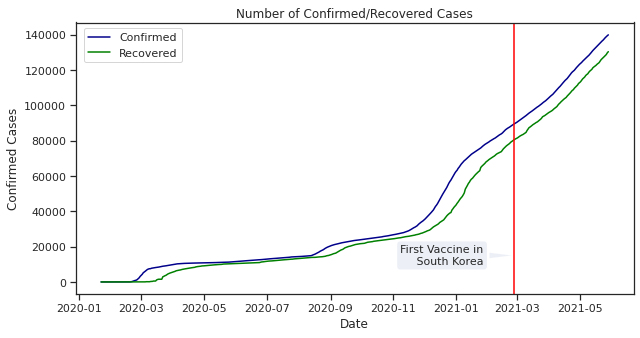

In [38]:
#Number of Confirmed/Recovered cases
sns.set_theme(style = 'ticks')
sns.set_context('notebook')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(df.Date, df.Confirmed,'darkblue', label = 'Confirmed')
ax.plot(df.Date, df.Recovered,'green', label = 'Recovered')

plt.axvline(dt.datetime(2021,2,26), color='red')

ax.annotate('First Vaccine in\n South Korea', xy=(dt.datetime(2021,2,26),15000),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1))

ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Number of Confirmed/Recovered Cases')
fig.legend(loc=1, bbox_to_anchor=(0.2,1), bbox_transform=ax.transAxes)

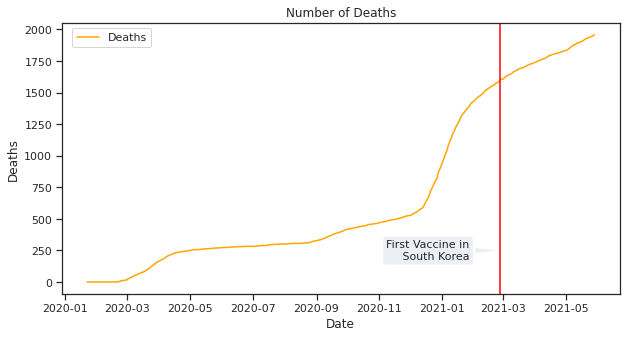

In [39]:
#Number of Deaths
sns.set_theme(style = 'ticks')
sns.set_context('notebook')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(df.Date, df.Deaths,'orange', label = 'Deaths')

plt.axvline(dt.datetime(2021,2,26), color='red')

ax.annotate('First Vaccine in\n South Korea', xy=(dt.datetime(2021,2,26),250),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1))

ax.set_xlabel('Date')
ax.set_ylabel('Deaths')
ax.set_title('Number of Deaths')
fig.legend(loc=1, bbox_to_anchor=(0.17,1), bbox_transform=ax.transAxes)

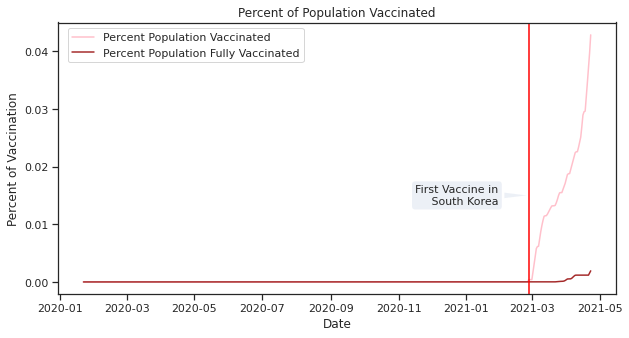

In [40]:
#Percent of Population Vaccinated/Fully Vaccinated
sns.set_theme(style = 'ticks')
sns.set_context('notebook')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(df.Date, df.percent_population_vaccinated,'pink', label = 'Percent Population Vaccinated')
ax.plot(df.Date, df.percent_population_fully_vaccinated,'brown', label = 'Percent Population Fully Vaccinated')

plt.axvline(dt.datetime(2021,2,26), color='red')

ax.annotate('First Vaccine in\n South Korea', xy=(dt.datetime(2021,2,26),0.015),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1))

ax.set_xlabel('Date')
ax.set_ylabel('Percent of Vaccination')
ax.set_title('Percent of Population Vaccinated')
fig.legend(loc=1, bbox_to_anchor=(0.45,1), bbox_transform=ax.transAxes)



---



# **Predictions**

**Prediction for Confirmed Cases**

In [41]:
df.isna().sum()

Date                                    0
Country/Region                          0
Confirmed                               0
Deaths                                  0
Recovered                               0
Percent_Confirmed                       1
Percent_Deaths                         29
total_tests                            36
total_vaccinations                     36
people_vaccinated                      36
people_fully_vaccinated                36
new_vaccinations                       36
population                             36
percent_population_vaccinated          36
percent_population_fully_vaccinated    36
dtype: int64

In [42]:
pred_df_case = df[['Date','Confirmed']]
pred_df_case = pred_df_case.rename(columns={'Date':'ds', 'Confirmed': 'y'})

model = Prophet()
model.fit(pred_df_case)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = model.make_future_dataframe(periods=94)
future.tail()

,ds
583,2021-08-27
584,2021-08-28
585,2021-08-29
586,2021-08-30
587,2021-08-31


In [44]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
583,2021-08-27,187416.943326,166490.522727,207475.250484
584,2021-08-28,187965.585210,166565.656872,208411.571667
585,2021-08-29,188449.714898,166645.126557,209906.801048
586,2021-08-30,188961.321377,166835.110968,210073.998056
587,2021-08-31,189535.536458,166560.942742,211075.366109


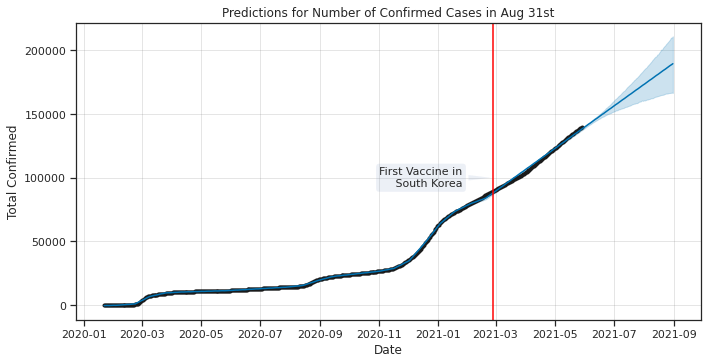

In [45]:
sns.set_theme(style = 'ticks')
sns.set_context('notebook')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
model.plot(forecast, xlabel='Date', ylabel='Total Confirmed', ax=ax)

plt.axvline(dt.datetime(2021,2,26), color='red')
ax.annotate('First Vaccine in\n South Korea', xy=(dt.datetime(2021,2,26),100000),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1))

ax.set_title('Predictions for Number of Confirmed Cases in Aug 31st')
fig.show()

**Prediction for Percent Confirmed**

In [46]:
pred_df_per_case = df[['Date','Percent_Confirmed']]
pred_df_per_case = pred_df_per_case.rename(columns={'Date':'ds', 'Percent_Confirmed': 'y'})

model = Prophet()
model.fit(pred_df_per_case)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
future_per_case = model.make_future_dataframe(periods=94)
future_per_case.tail()

,ds
583,2021-08-27
584,2021-08-28
585,2021-08-29
586,2021-08-30
587,2021-08-31


In [48]:
forecast_per_case = model.predict(future_per_case)
forecast_per_case[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
583,2021-08-27,0.043641,-0.141100,0.221058
584,2021-08-28,0.008381,-0.183453,0.200856
585,2021-08-29,0.005198,-0.174799,0.181151
586,2021-08-30,-0.000459,-0.181313,0.181182
587,2021-08-31,-0.006015,-0.194329,0.167874


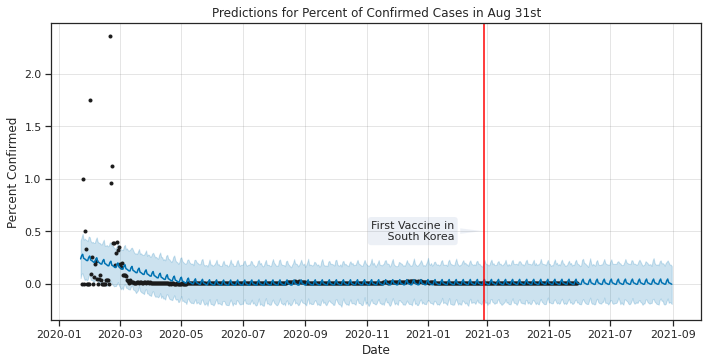

In [49]:
sns.set_theme(style = 'ticks')
sns.set_context('notebook')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
model.plot(forecast_per_case, xlabel='Date', ylabel='Percent Confirmed', ax=ax)

plt.axvline(dt.datetime(2021,2,26), color='red')
ax.annotate('First Vaccine in\n South Korea', xy=(dt.datetime(2021,2,26),0.5),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1))

ax.set_title('Predictions for Percent of Confirmed Cases in Aug 31st')
fig.show()

**Prediction for Deaths**

In [50]:
pred_df_death = df[['Date','Deaths']]
pred_df_death = pred_df_death.rename(columns={'Date':'ds', 'Deaths': 'y'})
model = Prophet()
model.fit(pred_df_death)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future_death = model.make_future_dataframe(periods=94)
future_death.tail()

,ds
583,2021-08-27
584,2021-08-28
585,2021-08-29
586,2021-08-30
587,2021-08-31


In [52]:
forecast_death = model.predict(future_death)
forecast_death[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
583,2021-08-27,2302.627564,1914.471320,2705.260810
584,2021-08-28,2305.945939,1904.692376,2718.018593
585,2021-08-29,2309.182673,1909.507296,2727.443464
586,2021-08-30,2313.604073,1903.382010,2732.674913
587,2021-08-31,2317.406443,1901.895730,2750.200122


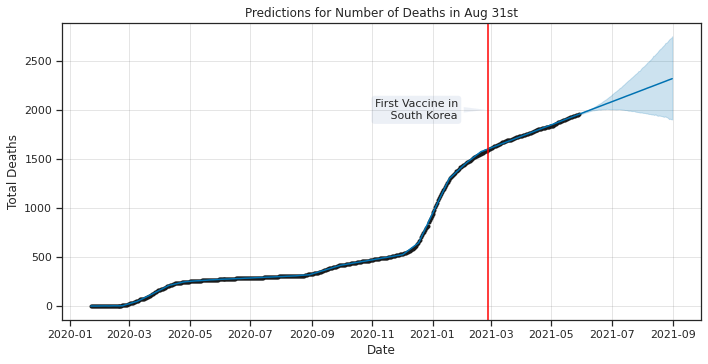

In [53]:
sns.set_theme(style = 'ticks')
sns.set_context('notebook')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
model.plot(forecast_death, xlabel='Date', ylabel='Total Deaths', ax=ax)

plt.axvline(dt.datetime(2021,2,26), color='red')
ax.annotate('First Vaccine in\n South Korea', xy=(dt.datetime(2021,2,26),2000),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1))

ax.set_title('Predictions for Number of Deaths in Aug 31st')
fig.show()

**Prediction for Percent_Deaths**

In [54]:
df['Percent_Deaths'] = df['Percent_Deaths'].replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df['Percent_Deaths'].dropna(inplace=True)

In [55]:
pred_df_per_death = df[['Date','Percent_Deaths']]
pred_df_per_death = pred_df_per_death.rename(columns={'Date':'ds', 'Percent_Deaths': 'y'})

In [56]:
model = Prophet()
model.fit(pred_df_per_death)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future_per_death = model.make_future_dataframe(periods=94)
future_per_death.tail()

,ds
583,2021-08-27
584,2021-08-28
585,2021-08-29
586,2021-08-30
587,2021-08-31


In [58]:
forecast_per_death = model.predict(future_per_death)
forecast_per_death[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
583,2021-08-27,0.012069,-0.119784,0.135549
584,2021-08-28,-0.000725,-0.127754,0.116936
585,2021-08-29,0.027898,-0.100118,0.163508
586,2021-08-30,0.011902,-0.116236,0.145452
587,2021-08-31,0.001177,-0.134398,0.131947


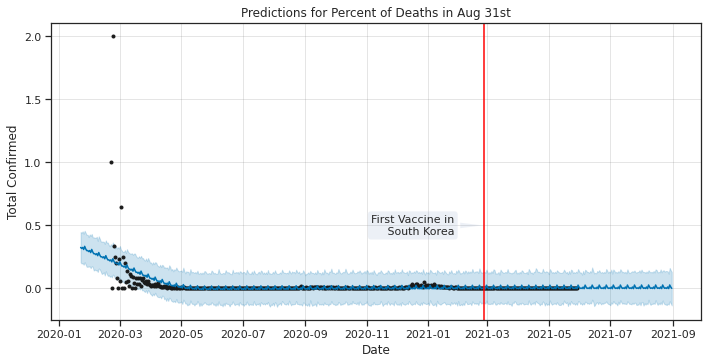

In [59]:
sns.set_theme(style = 'ticks')
sns.set_context('notebook')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
model.plot(forecast_per_death, xlabel='Date', ylabel='Total Confirmed', ax=ax)

plt.axvline(dt.datetime(2021,2,26), color='red')
ax.annotate('First Vaccine in\n South Korea', xy=(dt.datetime(2021,2,26),0.5),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1))

ax.set_title('Predictions for Percent of Deaths in Aug 31st')
fig.show()

**Prediction for Recoveries**

In [60]:
pred_df_rec = df[['Date','Recovered']]
pred_df_rec = pred_df_rec.rename(columns={'Date':'ds', 'Recovered': 'y'})

In [61]:
model = Prophet()
model.fit(pred_df_rec)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future_rec = model.make_future_dataframe(periods=94)
future_rec.tail()

,ds
583,2021-08-27
584,2021-08-28
585,2021-08-29
586,2021-08-30
587,2021-08-31


In [63]:
forecast_rec = model.predict(future_rec)
forecast_rec[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
583,2021-08-27,176038.767871,157702.115860,193886.091755
584,2021-08-28,176546.765297,158355.640806,194789.290634
585,2021-08-29,177002.029247,158395.666851,195602.242024
586,2021-08-30,177588.077645,158952.225267,196716.903944
587,2021-08-31,178149.191217,158899.777536,197574.994552


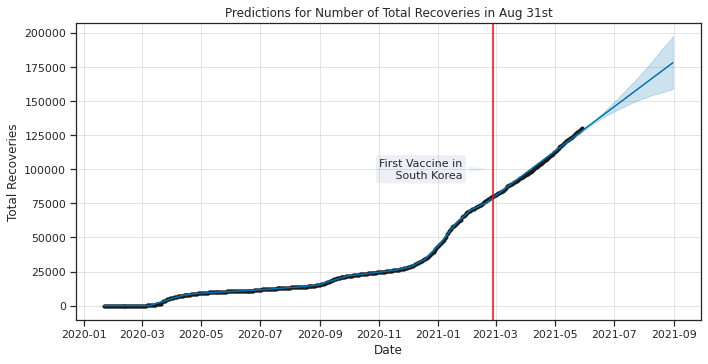

In [64]:
sns.set_theme(style = 'ticks')
sns.set_context('notebook')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
model.plot(forecast_rec, xlabel='Date', ylabel='Total Recoveries', ax=ax)

plt.axvline(dt.datetime(2021,2,26), color='red')
ax.annotate('First Vaccine in\n South Korea', xy=(dt.datetime(2021,2,26),100000),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1))

ax.set_title('Predictions for Number of Total Recoveries in Aug 31st')
fig.show()



---



# Calculating Vaccine Impact

In [65]:
first_day = df.iloc[0]
first_vaccine = df.loc[df['Date'] == '2021-02-26']
last_day = df.iloc[-1]

In [66]:
first_vaccine

,Date,Country/Region,Confirmed,Deaths,Recovered,Percent_Confirmed,Percent_Deaths,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,percent_population_vaccinated,percent_population_fully_vaccinated
401,2021-02-26,South Korea,89321.0,1595.0,80333.0,0.004487,0.006309,6521124.0,18489.0,18489.0,0.0,18489.0,51269183.0,0.000361,0.0


In [67]:
first_day

Date                                   2020-01-22 00:00:00
Country/Region                                 South Korea
Confirmed                                              1.0
Deaths                                                 0.0
Recovered                                              0.0
Percent_Confirmed                                      NaN
Percent_Deaths                                         NaN
total_tests                                           16.0
total_vaccinations                                     0.0
people_vaccinated                                      0.0
people_fully_vaccinated                                0.0
new_vaccinations                                       0.0
population                                      51269183.0
percent_population_vaccinated                          0.0
percent_population_fully_vaccinated                    0.0
Name: 0, dtype: object

In [68]:
last_day

Date                                   2021-05-29 00:00:00
Country/Region                                 South Korea
Confirmed                                         139910.0
Deaths                                              1957.0
Recovered                                         130381.0
Percent_Confirmed                                 0.003435
Percent_Deaths                                    0.003075
total_tests                                            NaN
total_vaccinations                                     NaN
people_vaccinated                                      NaN
people_fully_vaccinated                                NaN
new_vaccinations                                       NaN
population                                             NaN
percent_population_vaccinated                          NaN
percent_population_fully_vaccinated                    NaN
Name: 493, dtype: object

In [69]:
pre_vaccine_confirmed= forecast_per_case['yhat_upper'].iloc[0:401]
post_vaccine_confirmed= forecast_per_case['yhat_upper'].iloc[401:493]
future_post_vaccine_confirmed= forecast_per_case['yhat_upper'].iloc[401:587]

In [70]:
pre_vaccine_confirmed.describe()

count    401.000000
mean       0.222626
std        0.068478
min        0.155321
25%        0.178126
50%        0.193353
75%        0.231690
max        0.474002
Name: yhat_upper, dtype: float64

In [71]:
post_vaccine_confirmed.describe()

count    92.000000
mean      0.192890
std       0.017739
min       0.166847
25%       0.179973
50%       0.187542
75%       0.204058
max       0.235304
Name: yhat_upper, dtype: float64

In [72]:
future_post_vaccine_confirmed.describe()

count    186.000000
mean       0.193530
std        0.018288
min        0.157673
25%        0.180600
50%        0.188121
75%        0.205715
max        0.243302
Name: yhat_upper, dtype: float64

In [73]:
#Percentage Decrease = decrease / original * 100
pre_vaccine_confirmed_percentage = 0.2218
post_vaccine_confirmed_percentage = 0.1929
future_vaccine_confirmed_percentage = 0.1943

vaccine_impact_confirmed= ((pre_vaccine_confirmed_percentage-post_vaccine_confirmed_percentage)/pre_vaccine_confirmed_percentage)*100
future_vaccine_impact_confirmed= ((pre_vaccine_confirmed_percentage-future_vaccine_confirmed_percentage)/pre_vaccine_confirmed_percentage)*100
print(r'6/30', vaccine_impact_confirmed)
print(r'8/31', future_vaccine_impact_confirmed)

6/30 13.029756537421106
8/31 12.398557258791703


In [74]:
pre_vaccine_death = forecast_per_death['yhat_upper'].iloc[0:401]
post_vaccine_death = forecast_per_death['yhat_upper'].iloc[401:493]
future_vaccine_death = forecast_per_death['yhat_upper'].iloc[401:587]

In [75]:
pre_vaccine_death.describe()

count    401.000000
mean       0.166698
std        0.083390
min        0.104365
25%        0.121876
50%        0.131108
75%        0.152834
max        0.457916
Name: yhat_upper, dtype: float64

In [76]:
post_vaccine_death.describe()

count    92.000000
mean      0.130939
std       0.011436
min       0.109488
25%       0.122794
50%       0.128802
75%       0.136314
max       0.161398
Name: yhat_upper, dtype: float64

In [77]:
future_vaccine_death.describe()

count    186.000000
mean       0.132392
std        0.011245
min        0.109106
25%        0.124657
50%        0.130697
75%        0.138812
max        0.167189
Name: yhat_upper, dtype: float64

In [78]:
pre_vaccine_death_percentage = 0.1664
post_vaccine_death_percentage = 0.1309
future_vaccine_death_percentage = 0.1319

vaccine_impact_death = ((pre_vaccine_death_percentage-post_vaccine_death_percentage)/pre_vaccine_death_percentage) *100
future_vaccine_impact_death = ((pre_vaccine_death_percentage-future_vaccine_death_percentage)/pre_vaccine_death_percentage) *100
 
print(r'6/30', vaccine_impact_death)
print(r'8/31', future_vaccine_impact_death)

6/30 21.334134615384617
8/31 20.73317307692308


First Day of Vaccination in Korea = 2021-02-26

Last Day of Prediction = 2021-08-31


Average:

***Vaccine Impact Percent Decrease on Confirmed Cases = 13.03%*

***Vaccine Impact Percent Decrease on Deaths = 21.33%*


***Vaccine Impact Percent Decrease on Confirmed Cases (Future 8/31)= 12.40%*

***Vaccine Impact Percent Decrease on Deaths (Future 8/31)= 20.73%*



---



**Age/Gender Dataset**

In [79]:
df3 =pd.read_csv('/content/gdrive/My Drive/DataSets/Covid19GenAgeCaseInf_20220628.csv')

In [80]:
print(df3.shape)
df3.info()

(8472, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8472 entries, 0 to 8471
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seq           8472 non-null   int64  
 1   gubun         8472 non-null   object 
 2   confCase      8472 non-null   int64  
 3   confCaseRate  8472 non-null   float64
 4   death         6983 non-null   float64
 5   deathRate     8409 non-null   float64
 6   criticalRate  6806 non-null   float64
 7   createDt      8472 non-null   object 
 8   updateDt      4 non-null      object 
dtypes: float64(4), int64(2), object(3)
memory usage: 595.8+ KB


In [81]:
df3.head(20)

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
1,2,여성,5881,60.10,80.0,49.38,1.36,2020-04-02 19:02:48.48,NaN
2,3,80 이상,442,4.52,82.0,50.62,18.55,2020-04-02 19:02:48.48,NaN
3,4,70-79,651,6.65,46.0,28.40,7.07,2020-04-02 19:02:48.48,NaN
4,5,60-69,1235,12.62,22.0,13.58,1.78,2020-04-02 19:02:48.48,NaN
5,6,50-59,1851,18.91,10.0,6.17,0.54,2020-04-02 19:02:48.48,NaN
6,7,40-49,1312,13.41,1.0,0.62,0.08,2020-04-02 19:02:48.48,NaN
7,8,30-39,1012,10.34,1.0,0.62,0.10,2020-04-02 19:02:48.48,NaN
8,9,20-29,2656,27.14,NaN,NaN,NaN,2020-04-02 19:02:48.48,NaN
9,10,10-19,515,5.26,NaN,NaN,NaN,2020-04-02 19:02:48.48,NaN


In [82]:
df3['createDt'] =df3.createDt.astype(str)

In [83]:
df3['createDt'] = pd.to_datetime(df3['createDt'])

In [84]:
df3['createDt'] = pd.to_datetime(df3['createDt'].dt.strftime('%Y-%m-%d'))

In [85]:
df3 = df3[df3['createDt'] <= '2021-06-30']

In [86]:
print(df3.shape)

(4666, 9)


In [87]:
df3.isna().sum()

seq                0
gubun              0
confCase           0
confCaseRate       0
death           1151
deathRate          9
criticalRate    1149
createDt           0
updateDt        4666
dtype: int64

In [88]:
df3.tail()

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
4661,9877,40-49,24225,15.43,15.0,0.74,0.06,2021-06-30,NaN
4662,9878,30-39,22048,14.05,8.0,0.40,0.04,2021-06-30,NaN
4663,9879,20-29,24143,15.38,3.0,0.15,0.01,2021-06-30,NaN
4664,9880,10-19,11344,7.23,NaN,0.00,NaN,2021-06-30,NaN
4665,9881,0-9,7154,4.56,NaN,0.00,NaN,2021-06-30,NaN


In [89]:
df3.gubun.unique()

array(['남성', '여성', '80 이상', '70-79', '60-69', '50-59', '40-49', '30-39',
       '20-29', '10-19', '0-9', '0-11'], dtype=object)

In [90]:
df3["gubun"] = df3["gubun"].apply(lambda x: x.replace("남성", "Male"))
df3["gubun"] = df3["gubun"].apply(lambda x: x.replace("여성", "Female"))
df3["gubun"] = df3["gubun"].apply(lambda x: x.replace("80 이상", "80+"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [91]:
df3 = df3.drop(columns=['seq', 'updateDt'])

In [92]:
age_group ='0-9', '10-19', '20-29', '30-39', '40-49','50-59','60-69','70-79','80+'

In [93]:
gender = 'Male', 'Female'

In [94]:
df_age = df3[df3.gubun.isin(age_group)]

In [95]:
df_gender = df3[df3.gubun.isin(gender)]

Text(0.5, 1.0, 'Total Confirmed by Age Group')

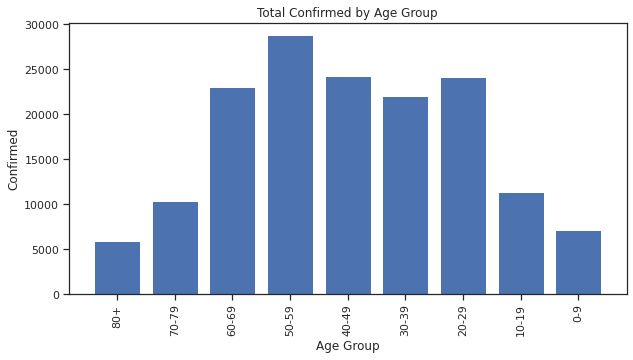

In [96]:
#Total Confirmed by Age Group
sns.set_theme(style = 'ticks')
sns.set_context('notebook')

fig = plt.figure(figsize=(10,5))
plt.bar(df_age.gubun, df_age.confCase)
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('Confirmed')
plt.title('Total Confirmed by Age Group')

Text(0.5, 1.0, 'Total Deaths by Age Group')

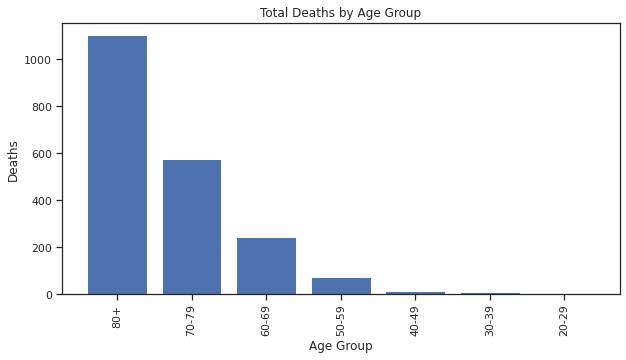

In [97]:
#Total Deaths by Age Group
sns.set_theme(style = 'ticks')
sns.set_context('notebook')

fig = plt.figure(figsize=(10,5))
plt.bar(df_age.gubun, df_age.death)
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('Deaths')
plt.title('Total Deaths by Age Group')

Text(0.5, 1.0, 'Total Death Rate by Age Group')

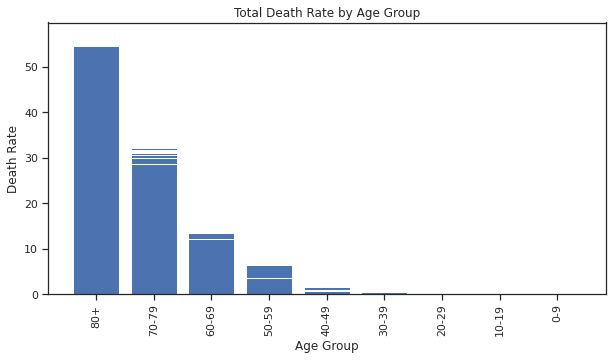

In [98]:
#Total Death Rate by Age Group
sns.set_theme(style = 'ticks')
sns.set_context('notebook')

fig = plt.figure(figsize=(10,5))
plt.bar(df_age.gubun, df_age.deathRate)
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Total Death Rate by Age Group')

Text(0.5, 1.0, 'Total Critical Rate by Age Group')

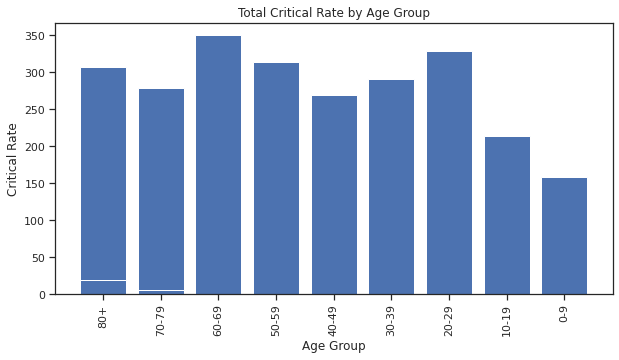

In [99]:
#Total Critical Rate by Age Group
sns.set_theme(style = 'ticks')
sns.set_context('notebook')

fig = plt.figure(figsize=(10,5))
plt.bar(df_age.gubun, df_age.criticalRate)
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('Critical Rate')
plt.title('Total Critical Rate by Age Group')

Text(0.5, 1.0, 'Total Confirmed by Gender')

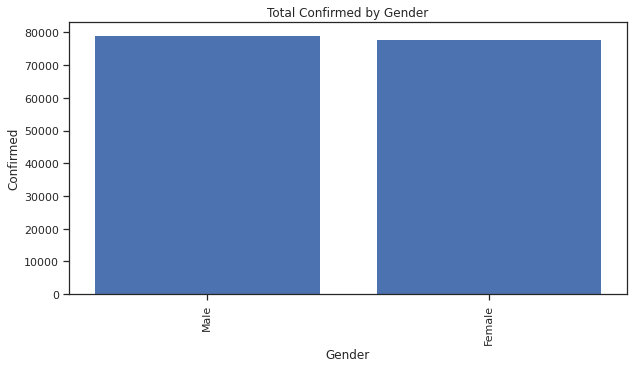

In [100]:
#Total Confirmed by Gender
sns.set_theme(style = 'ticks')
sns.set_context('notebook')

fig = plt.figure(figsize=(10,5))
plt.bar(df_gender.gubun, df_gender.confCase)
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Confirmed')
plt.title('Total Confirmed by Gender')

Text(0.5, 1.0, 'Total Deaths by Gender')

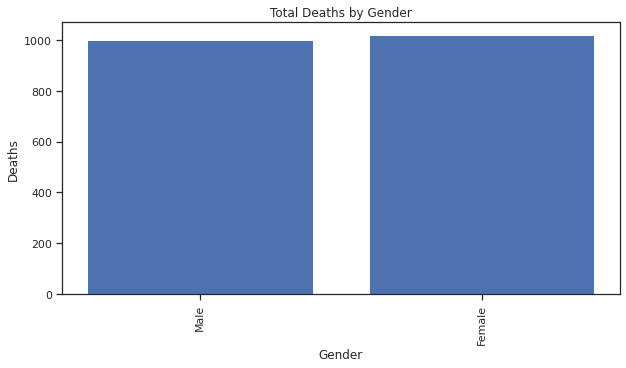

In [101]:
#Total Deaths by Gender
sns.set_theme(style = 'ticks')
sns.set_context('notebook')

fig = plt.figure(figsize=(10,5))
plt.bar(df_gender.gubun, df_gender.death)
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Deaths')
plt.title('Total Deaths by Gender')



---



In [102]:
mortality_group = '60-69', '70-79', '80+'
mobility_group = '20-29', '30-39', '40-49', '50-59'

In [103]:
df_mortality = df_age[df_age['gubun'].isin(mortality_group)]
df_mobility = df_age[df_age['gubun'].isin(mobility_group)]

In [104]:
df_mortality.describe()

,confCase,confCaseRate,death,deathRate,criticalRate
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,4845.930031,8.734379,274.194969,31.341022,10.810236
std,5354.955643,4.380239,291.143822,16.338530,16.970876
min,442.000000,3.760000,22.000000,10.480000,1.040000
25%,982.750000,4.530000,81.000000,13.732500,2.230000
50%,2660.500000,7.255000,153.500000,29.315000,6.620000
75%,5932.500000,12.992500,345.500000,49.542500,19.040000
max,23069.000000,16.020000,1100.000000,56.870000,349.860000


In [105]:
df_mobility.describe()

,confCase,confCaseRate,death,deathRate,criticalRate
count,1697.000000,1697.000000,1394.000000,1694.000000,1394.000000
mean,8454.847967,16.219193,13.596126,1.496222,1.065179
std,7328.177368,4.054229,17.427022,1.824745,16.117564
min,1012.000000,10.340000,1.000000,0.000000,0.010000
25%,2536.000000,13.290000,3.000000,0.312500,0.060000
50%,4747.000000,14.950000,6.000000,0.750000,0.120000
75%,13976.000000,18.400000,15.000000,2.632500,0.280000
max,28760.000000,27.900000,73.000000,6.770000,328.690000


In [106]:
#Mortality Group Summary

mort_avg_deathRate= 31.34
mort_avg_confRate= 8.73

mort_vacc_exp_outcome_death = mort_avg_deathRate - vaccine_impact_death
#mort_vacc_exp_outcome_case = mort_avg_confRate - vaccine_impact_confirmed
future_mort_vacc_exp_outcome_death = mort_avg_deathRate - future_vaccine_impact_death
#future_mort_vacc_exp_outcome_case = mort_avg_confRate - future_vaccine_impact_confirmed


print(r'Expected Vaccine Outcome on Death Rate for Mortality Group:', mort_vacc_exp_outcome_death)
#print(r'Expected Vaccine Outcome on Confirmation Rate for Mortality Group:', mort_vacc_exp_outcome_case)
print(r'Future Expected Vaccine Outcome on Death Rate for Mortality Group:', future_mort_vacc_exp_outcome_death)
#print(r'Future Expected Vaccine Outcome on Confirmation Rate for Mortality Group:', future_mort_vacc_exp_outcome_case)


Expected Vaccine Outcome on Death Rate for Mortality Group: 10.005865384615383
Future Expected Vaccine Outcome on Death Rate for Mortality Group: 10.60682692307692


In [107]:
#Mobility Group Summary

mob_avg_deathRate= 1.5
mob_avg_confRate= 16.22

#mob_vacc_exp_outcome_death = mob_avg_deathRate - vaccine_impact_death
mob_vacc_exp_outcome_case = mob_avg_confRate - vaccine_impact_confirmed
#future_mob_vacc_exp_outcome_death = mob_avg_deathRate - future_vaccine_impact_death
future_mob_vacc_exp_outcome_case = mob_avg_confRate - future_vaccine_impact_confirmed


#print(r'Expected Vaccine Outcome on Death Rate for Mobility Group:', mob_vacc_exp_outcome_death)
print(r'Expected Vaccine Outcome on Confirmation Rate for Mobility Group:', mob_vacc_exp_outcome_case)
#print(r'Future Expected Vaccine Outcome on Death Rate for Mobility Group:', future_mob_vacc_exp_outcome_death)
print(r'Future Expected Vaccine Outcome on Confirmation Rate for Mobility Group:', future_mob_vacc_exp_outcome_case)

Expected Vaccine Outcome on Confirmation Rate for Mobility Group: 3.190243462578893
Future Expected Vaccine Outcome on Confirmation Rate for Mobility Group: 3.821442741208296




---

